# **Binary Classification using Perceptron Algorithm**

This notebook showcases the implementation and training of a perceptron algorithm for binary classification. The dataset used is the "Banknote Authentication Data" (https://archive.ics.uci.edu/dataset/267/banknote+authentication), focusing on features derived from wavelet-transformed images. The notebook covers data visualization, algorithm implementation, and training progress visualization.

The dataset is loaded from the UCI Machine Learning Repository, and the features include variance, skewness, curtosis, and entropy of wavelet-transformed images. The target variable "class" indicates whether a banknote is authentic or not.

A perceptron algorithm is implemented from scratch, and its training progress is visualized over 15 iterations. The notebook includes functions for predicting, training, and evaluating the perceptron.

The trained perceptron is tested on a separate test set, and the classification results are presented through a confusion matrix and a classification report.

A heatmap illustrates the confusion matrix, providing insights into the model's predictive performance. The training progress is also visualized to showcase accuracy improvements over iterations.

Note: Ensure that the required libraries are installed, and the path to the dataset file is correctly specified before running the notebook.

# **Importing**

## Libraries

In [ ]:
import pandas as pd
import numpy as np

from statistics import mode

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import classification_report
import seaborn as sns

## Dataset

In [ ]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt")

In [ ]:
columns = ["variance of Wavelet Transformed image",
       "skewness of Wavelet Transformed image",
       "curtosis of Wavelet Transformed image",
       "entropy of image",
       "class"]

data.columns = columns

In [ ]:
data

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,4.54590,8.16740,-2.4586,-1.46210,0
1,3.86600,-2.63830,1.9242,0.10645,0
2,3.45660,9.52280,-4.0112,-3.59440,0
3,0.32924,-4.45520,4.5718,-0.98880,0
4,4.36840,9.67180,-3.9606,-3.16250,0
...,...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949,1
1367,-1.38870,-4.87730,6.4774,0.34179,1
1368,-3.75030,-13.45860,17.5932,-2.77710,1
1369,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
X = data
y = X.pop("class")

In [ ]:
X

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image
0,4.54590,8.16740,-2.4586,-1.46210
1,3.86600,-2.63830,1.9242,0.10645
2,3.45660,9.52280,-4.0112,-3.59440
3,0.32924,-4.45520,4.5718,-0.98880
4,4.36840,9.67180,-3.9606,-3.16250
...,...,...,...,...
1366,0.40614,1.34920,-1.4501,-0.55949
1367,-1.38870,-4.87730,6.4774,0.34179
1368,-3.75030,-13.45860,17.5932,-2.77710
1369,-3.56370,-8.38270,12.3930,-1.28230


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1366    1
1367    1
1368    1
1369    1
1370    1
Name: class, Length: 1371, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.3, random_state=0)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test,  test_size = 0.2, random_state=0)

# **Presenting data**

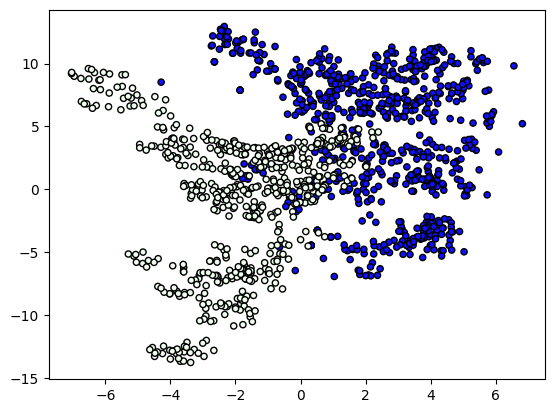

In [ ]:
cmap=ListedColormap(['#0F0FFF', '#F0FFF0',])

plt.figure()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap, edgecolor='k', s=20)
plt.show()

##zmniszyć wymiary

# **Algorithm implementation**

## Trainning function


In [ ]:
def predict(w, X):
    # Inject the bias column.
    X = np.asarray(X)
    X = np.concatenate((X, np.asarray([[1] * X.shape[0]]).T), axis=1)

    return (X @ w > 0).astype(int)

In [ ]:
def fit(max_iters, X_t, y_t, X_v, y_v):
        # Initialize random weights.
        w = np.random.random(X_t.shape[1] + 1)

        #Checking model result ith random weights

        zero_prediction_train = predict(w, X_t)
        zero_accurance_train = np.sum(zero_prediction_train == y_t.values) / len(y_t.values)

        zero_prediction_validation = predict(w, X_v)
        zero_accurance_validation = np.sum(zero_prediction_validation == y_v.values) / len(y_v.values)

        history_accurances = [[zero_accurance_train], [zero_accurance_validation]]

        print(f"0 iteration: train accuranacy {zero_accurance_train:.2%}, validation accurancy {zero_accurance_validation:.2%}")

        # Bookkeeping.
        X_t, y_t = np.asarray(X_t), np.asarray(y_t)
        iters = 0

        # Insert a bias column.
        X_t = np.concatenate((X_t, np.asarray([[1] * X_t.shape[0]]).T), axis=1)

        # Train as many rounds as allotted, or until fully converged.
        for _ in range(max_iters):
            y_pred_all = []
            for idx in range(X_t.shape[0]):
                x_sample, y_sample = X_t[idx], y_t[idx]
                y_pred = int(np.sum(w * x_sample) >= 0)
                if y_pred == y_sample:
                    pass
                elif y_pred == 0 and y_sample == 1:
                    w = w + x_sample
                elif y_pred == 1 and y_sample == 0:
                    w = w - x_sample

                y_pred_all.append(y_pred)

            iters += 1

            # Learning progress check
            prediction_validation = predict(w, X_v)
            accurance_validation = np.sum(prediction_validation == y_v.values) / len(y_v.values)

            accurance_train = np.sum(y_pred_all == y_train.values) / len(y_train.values)

            history_accurances[0].append(accurance_train)
            history_accurances[1].append(accurance_validation)

            sum_text = f"\n{iters} iteration: train accuranacy {accurance_train:.2%}, validation accurancy {accurance_validation:.2%}\n"
            print("_"*len(sum_text) + sum_text + "_"*len(sum_text))

            if np.equal(np.array(y_pred_all), y_t).all():
                break

        return w, history_accurances


In [ ]:
weights, training_process_history = fit(15, X_train, y_train, X_val, y_val)

0 iteration: train accuranacy 46.09%, validation accurancy 40.96%
___________________________________________________________________
1 iteration: train accuranacy 93.74%, validation accurancy 95.18%
___________________________________________________________________
___________________________________________________________________
2 iteration: train accuranacy 96.98%, validation accurancy 93.98%
___________________________________________________________________
___________________________________________________________________
3 iteration: train accuranacy 96.98%, validation accurancy 96.39%
___________________________________________________________________
___________________________________________________________________
4 iteration: train accuranacy 97.50%, validation accurancy 95.18%
___________________________________________________________________
___________________________________________________________________
5 iteration: train accuranacy 98.33%, validation accurancy

# **Testing algorithm**

## Testing for 15 iterations

In [ ]:
predictions = predict(weights, X_test)
accurance = np.sum(predictions == y_test.values) / len(y_test.values)

print(f"Accurance for 15 iterations: {accurance:.2%}")

Accurance for 15 iterations: 99.39%


## Defining Confusion marrix

In [ ]:
def comp_confmat(actual, predicted):

    classes = np.unique(actual)

    confmat = np.zeros((len(classes), len(classes)))

    for i in range(len(classes)):
        for j in range(len(classes)):

           confmat[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))

    return confmat

In [ ]:
con_matrix = comp_confmat(predictions, y_test)

In [ ]:
con_matrix

array([[186.,   0.],
       [  2., 141.]])

Text(0.5, 1.0, 'Model Accuracy Score: 99.39%')

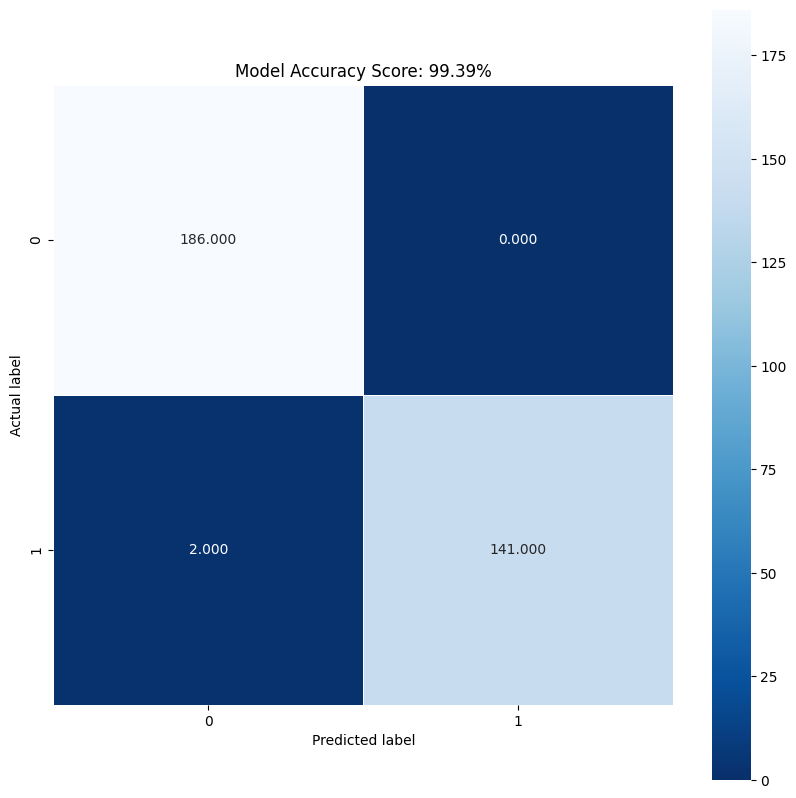

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(con_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels = y.unique(), xticklabels = y.unique())
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Model Accuracy Score: {accurance:.2%}'
plt.title(all_sample_title)

In [ ]:
print(classification_report(y_test, predictions, target_names=['1', '2']))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       188
           2       0.99      1.00      0.99       141

    accuracy                           0.99       329
   macro avg       0.99      0.99      0.99       329
weighted avg       0.99      0.99      0.99       329



## Vizualization of training process

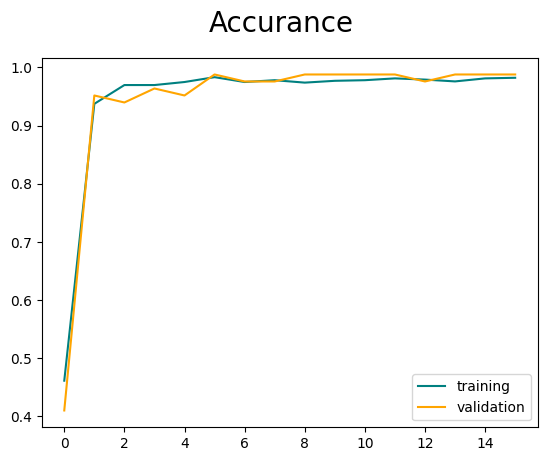

In [ ]:
fig = plt.figure()
plt.plot(training_process_history[0], color='teal', label='training')
plt.plot(training_process_history[1], color='orange', label='validation')
fig.suptitle('Accurance', fontsize=20)
plt.legend(loc="lower right")
plt.show()